# Comparing Clustering Algorithms

## Importing Libraries

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel('language.xlsx')
df.head()

,Group,Age,Sex,Handedness,Education_years,IllnessDur_months,Ethnicity,NART_Full_IQ,PANSS_CD,PANSS_total,...,WASI_Vocab,WASI_MatrixReas,WASI_Similarities,WASI_VIQ,WASI_PIQ,WASI_FSIQ4,TROG_Total,BNT_Overall_score,Brixton_total,Pyramids_palmtrees
0,SZ-FTD,36,Male,right,16.0,84.0,White British,113.0,1.0,73.0,...,48.0,27.0,39.0,119.0,136.0,130.0,19.0,59.0,25.0,51.0
1,SZ-FTD,48,Male,right,11.0,304.0,White British,81.0,1.0,65.0,...,30.0,21.0,29.0,87.0,99.0,92.0,16.0,53.0,30.0,49.0
2,SZ-FTD,43,Female,right,14.0,276.0,White British,108.0,2.0,102.0,...,37.0,18.0,25.0,89.0,96.0,91.0,19.0,53.0,40.0,52.0
3,SZ-FTD,45,Male,right,11.0,288.0,White British,92.0,2.0,103.0,...,35.0,16.0,21.0,84.0,90.0,85.0,18.0,50.0,42.0,50.0
4,SZ-FTD,45,Female,right,20.0,264.0,White British,108.0,1.0,87.0,...,36.0,26.0,32.0,95.0,120.0,108.0,18.0,59.0,33.0,52.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Group                   111 non-null    object 
 1   Age                     111 non-null    int64  
 2   Sex                     111 non-null    object 
 3   Handedness              111 non-null    object 
 4   Education_years         111 non-null    float64
 5   IllnessDur_months       50 non-null     float64
 6   Ethnicity               61 non-null     object 
 7   NART_Full_IQ            61 non-null     float64
 8   PANSS_CD                61 non-null     float64
 9   PANSS_total             61 non-null     float64
 10  WASI_Tscore_BlockDes    61 non-null     float64
 11  WASI_Tscore_Vocab       61 non-null     float64
 12  WASI_Tscore_MatrixReas  108 non-null    float64
 13  WASI_Tscore_Similar     61 non-null     float64
 14  WASI_BlockDes           61 non-null     fl

In [8]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,Age,Education_years,IllnessDur_months,NART_Full_IQ,PANSS_CD,PANSS_total,WASI_Tscore_BlockDes,WASI_Tscore_Vocab,WASI_Tscore_MatrixReas,WASI_Tscore_Similar,...,WASI_Vocab,WASI_MatrixReas,WASI_Similarities,WASI_VIQ,WASI_PIQ,WASI_FSIQ4,TROG_Total,BNT_Overall_score,Brixton_total,Pyramids_palmtrees
count,111.00,111.0,50.00,61.00,61.00,61.00,61.00,61.00,108.00,61.00,...,61.00,109.00,61.00,61.00,61.00,61.00,108.00,109.00,108.00,110.00
mean,54.88,14.7,159.90,114.97,2.25,73.52,48.30,45.36,52.53,41.92,...,34.13,18.69,26.23,89.61,100.28,94.39,16.36,52.75,148.41,143.83
std,16.04,3.3,122.89,115.83,1.82,33.59,11.44,11.64,11.82,8.99,...,10.02,5.29,7.20,15.56,19.78,17.67,4.14,9.39,310.73,282.86
min,22.00,8.0,24.00,71.00,1.00,32.00,20.00,20.00,25.00,20.00,...,0.00,7.00,3.00,49.00,56.00,52.00,0.00,8.00,5.00,36.00
25%,40.50,12.0,60.00,90.00,1.00,42.00,43.00,37.00,47.00,36.00,...,27.00,16.00,21.00,79.00,86.00,81.00,15.00,52.00,30.00,50.00
50%,58.00,15.0,113.50,102.00,1.00,65.00,50.00,48.00,54.00,42.00,...,37.00,20.00,27.00,91.00,103.00,98.00,18.00,56.00,38.00,51.00
75%,67.00,16.5,251.00,113.00,3.00,102.00,56.00,53.00,61.00,48.00,...,41.00,22.00,32.00,100.00,114.00,106.00,19.00,58.00,42.00,52.00
max,85.00,26.0,456.00,999.00,6.00,140.00,69.00,70.00,77.00,63.00,...,50.00,29.00,40.00,119.00,136.00,130.00,20.00,60.00,999.00,999.00


In [9]:
# stats of categorical data
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

if not categorical_columns.empty:
    categorical_description = df[categorical_columns].describe()
    print(round(categorical_description, 2))
else:
    print("No categorical columns found in the DataFrame.")

        Group   Sex Handedness      Ethnicity
count     111   111        111             61
unique      6     2          3              2
top     HCaph  Male      right  White British
freq       30    63        103             60


## Handling Missing Data

In [10]:
df.isnull().sum()

Group                      0
Age                        0
Sex                        0
Handedness                 0
Education_years            0
IllnessDur_months         61
Ethnicity                 50
NART_Full_IQ              50
PANSS_CD                  50
PANSS_total               50
WASI_Tscore_BlockDes      50
WASI_Tscore_Vocab         50
WASI_Tscore_MatrixReas     3
WASI_Tscore_Similar       50
WASI_BlockDes             50
WASI_Vocab                50
WASI_MatrixReas            2
WASI_Similarities         50
WASI_VIQ                  50
WASI_PIQ                  50
WASI_FSIQ4                50
TROG_Total                 3
BNT_Overall_score          2
Brixton_total              3
Pyramids_palmtrees         1
dtype: int64

In [11]:
def handle_missing_data(df):
    """
    Replaces NaN values in numerical columns with the mean of the respective columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with numerical columns to handle missing data.
    
    Returns:
    pd.DataFrame: A DataFrame with missing numerical data replaced by column means.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    for column in numerical_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    
    return df

df = handle_missing_data(df)

# Label Encoding

In [12]:
df.head()

,Group,Age,Sex,Handedness,Education_years,IllnessDur_months,Ethnicity,NART_Full_IQ,PANSS_CD,PANSS_total,...,WASI_Vocab,WASI_MatrixReas,WASI_Similarities,WASI_VIQ,WASI_PIQ,WASI_FSIQ4,TROG_Total,BNT_Overall_score,Brixton_total,Pyramids_palmtrees
0,SZ-FTD,36,Male,right,16.0,84.0,White British,113.0,1.0,73.0,...,48.0,27.0,39.0,119.0,136.0,130.0,19.0,59.0,25.0,51.0
1,SZ-FTD,48,Male,right,11.0,304.0,White British,81.0,1.0,65.0,...,30.0,21.0,29.0,87.0,99.0,92.0,16.0,53.0,30.0,49.0
2,SZ-FTD,43,Female,right,14.0,276.0,White British,108.0,2.0,102.0,...,37.0,18.0,25.0,89.0,96.0,91.0,19.0,53.0,40.0,52.0
3,SZ-FTD,45,Male,right,11.0,288.0,White British,92.0,2.0,103.0,...,35.0,16.0,21.0,84.0,90.0,85.0,18.0,50.0,42.0,50.0
4,SZ-FTD,45,Female,right,20.0,264.0,White British,108.0,1.0,87.0,...,36.0,26.0,32.0,95.0,120.0,108.0,18.0,59.0,33.0,52.0


In [13]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [14]:
def encode_categorical_columns(df):
    """
    Encodes all categorical columns in the DataFrame using LabelEncoder.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with categorical columns to be encoded.
    
    Returns:
    pd.DataFrame: A DataFrame with all categorical columns encoded.
    """
    enc = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for column in categorical_columns:
        df[column] = enc.fit_transform(df[column])
    
    return df

# Encode the categorical columns
df = encode_categorical_columns(df)

# Checking the Dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Group                   111 non-null    int32  
 1   Age                     111 non-null    int64  
 2   Sex                     111 non-null    int32  
 3   Handedness              111 non-null    int32  
 4   Education_years         111 non-null    float64
 5   IllnessDur_months       111 non-null    float64
 6   Ethnicity               111 non-null    int32  
 7   NART_Full_IQ            111 non-null    float64
 8   PANSS_CD                111 non-null    float64
 9   PANSS_total             111 non-null    float64
 10  WASI_Tscore_BlockDes    111 non-null    float64
 11  WASI_Tscore_Vocab       111 non-null    float64
 12  WASI_Tscore_MatrixReas  111 non-null    float64
 13  WASI_Tscore_Similar     111 non-null    float64
 14  WASI_BlockDes           111 non-null    fl

In [16]:
df.isnull().sum()

Group                     0
Age                       0
Sex                       0
Handedness                0
Education_years           0
IllnessDur_months         0
Ethnicity                 0
NART_Full_IQ              0
PANSS_CD                  0
PANSS_total               0
WASI_Tscore_BlockDes      0
WASI_Tscore_Vocab         0
WASI_Tscore_MatrixReas    0
WASI_Tscore_Similar       0
WASI_BlockDes             0
WASI_Vocab                0
WASI_MatrixReas           0
WASI_Similarities         0
WASI_VIQ                  0
WASI_PIQ                  0
WASI_FSIQ4                0
TROG_Total                0
BNT_Overall_score         0
Brixton_total             0
Pyramids_palmtrees        0
dtype: int64

In [17]:
df.head()

,Group,Age,Sex,Handedness,Education_years,IllnessDur_months,Ethnicity,NART_Full_IQ,PANSS_CD,PANSS_total,...,WASI_Vocab,WASI_MatrixReas,WASI_Similarities,WASI_VIQ,WASI_PIQ,WASI_FSIQ4,TROG_Total,BNT_Overall_score,Brixton_total,Pyramids_palmtrees
0,5,36,1,2,16.0,84.0,1,113.0,1.0,73.0,...,48.0,27.0,39.0,119.0,136.0,130.0,19.0,59.0,25.0,51.0
1,5,48,1,2,11.0,304.0,1,81.0,1.0,65.0,...,30.0,21.0,29.0,87.0,99.0,92.0,16.0,53.0,30.0,49.0
2,5,43,0,2,14.0,276.0,1,108.0,2.0,102.0,...,37.0,18.0,25.0,89.0,96.0,91.0,19.0,53.0,40.0,52.0
3,5,45,1,2,11.0,288.0,1,92.0,2.0,103.0,...,35.0,16.0,21.0,84.0,90.0,85.0,18.0,50.0,42.0,50.0
4,5,45,0,2,20.0,264.0,1,108.0,1.0,87.0,...,36.0,26.0,32.0,95.0,120.0,108.0,18.0,59.0,33.0,52.0


# Data Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
# Select relevant features for clustering
all_features = df.columns
selected_features = []
X = df[all_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA

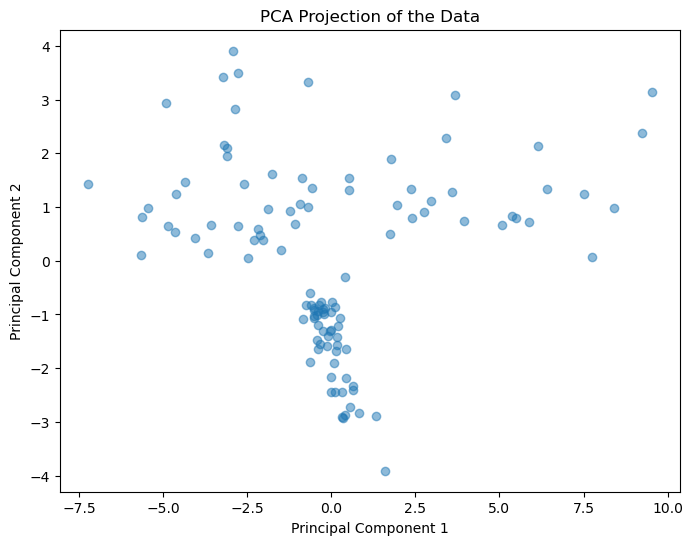

In [20]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Algorithms

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [22]:
# Custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Custom scorer for Davies-Bouldin score
def davies_bouldin_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return -davies_bouldin_score(X, labels)  # Negative because GridSearchCV maximizes the score

In [23]:
kmeans_params = {
    'n_clusters': range(2, 7),
    'init': ['k-means++'],
    'n_init': [10, 20, 30]
}

kmeans = KMeans(random_state=42)
kmeans_grid = GridSearchCV(kmeans, kmeans_params, scoring=silhouette_scorer, cv=5)
kmeans_grid.fit(X_pca)

print("Best KMeans parameters:", kmeans_grid.best_params_)
print("Best KMeans silhouette score:", kmeans_grid.best_score_)

Best KMeans parameters: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Best KMeans silhouette score: 0.5494578361505386


In [24]:
dbscan_params = {
  'eps': np.arange(0.1, 1.1, 0.1),
  'min_samples': range(2, 11),
}

dbscan = DBSCAN()
dbscan_grid = GridSearchCV(dbscan, dbscan_params, scoring=silhouette_scorer, cv=5)
dbscan_grid.fit(X_pca)

print("Best DBSCAN parameters:", dbscan_grid.best_params_)
print("Best DBSCAN silhouette score:", dbscan_grid.best_score_)

Best DBSCAN parameters: {'eps': 0.30000000000000004, 'min_samples': 2}
Best DBSCAN silhouette score: 0.015951439884165246


In [25]:
agg_params = {
    'n_clusters': range(2, 7),
    'linkage': ['ward', 'complete', 'average'],
    'affinity': ['euclidean', 'manhattan'],
}

agg = AgglomerativeClustering()
agg_grid = GridSearchCV(agg, agg_params, scoring=silhouette_scorer, cv=5)
agg_grid.fit(X_pca)

print("Best Agglomerative Clustering parameters:", agg_grid.best_params_)
print("Best Agglomerative Clustering silhouette score:", agg_grid.best_score_)

Best Agglomerative Clustering parameters: {'affinity': 'manhattan', 'linkage': 'complete', 'n_clusters': 2}
Best Agglomerative Clustering silhouette score: 0.5437230812748722


In [26]:
spectral_params = {
    'n_clusters': [2, 3, 4, 5],
    'affinity': ['rbf', 'nearest_neighbors'],
    'gamma': [0.1, 0.5, 1.0],
    'assign_labels': ['kmeans', 'discretize'],
}

spectral = SpectralClustering(random_state=42)
spectral_grid = GridSearchCV(spectral, spectral_params, scoring=silhouette_scorer, cv=5)
spectral_grid.fit(X_pca)

print("Best Spectral Clustering parameters:", spectral_grid.best_params_)
print("Best Spectral Clustering silhouette score:", spectral_grid.best_score_)

Best Spectral Clustering parameters: {'affinity': 'rbf', 'assign_labels': 'kmeans', 'gamma': 0.1, 'n_clusters': 2}
Best Spectral Clustering silhouette score: 0.5473647454303381


In [27]:
# Set a global random seed
np.random.seed(42)

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Define clustering algorithms and parameters
algorithms = {
    'KMeans': KMeans(**kmeans_grid.best_params_),
    'DBSCAN': DBSCAN(**dbscan_grid.best_params_),
    'AgglomerativeClustering': AgglomerativeClustering(**agg_grid.best_params_),
    'SpectralClustering': SpectralClustering(**spectral_grid.best_params_),
}

# Evaluate clustering performance
results = []
for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X_pca)
        silhouette_avg = silhouette_score(X_pca, labels)
        davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
        results.append({'Algorithm': name, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Score': davies_bouldin_avg})
    except Exception as e:
        results.append({'Algorithm': name, 'Silhouette Score': 'Error: ' + str(e), 'Davies-Bouldin Score': 'Error: ' + str(e)})

# Print results
df_results = pd.DataFrame(results)
print(df_results)

                 Algorithm  Silhouette Score  Davies-Bouldin Score
0                   KMeans          0.552655              0.688558
1                   DBSCAN          0.030498              3.590133
2  AgglomerativeClustering          0.574124              0.574905
3       SpectralClustering          0.578317              0.500851
